In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier , export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [3]:
data =pd.read_csv('winequality_dataset.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


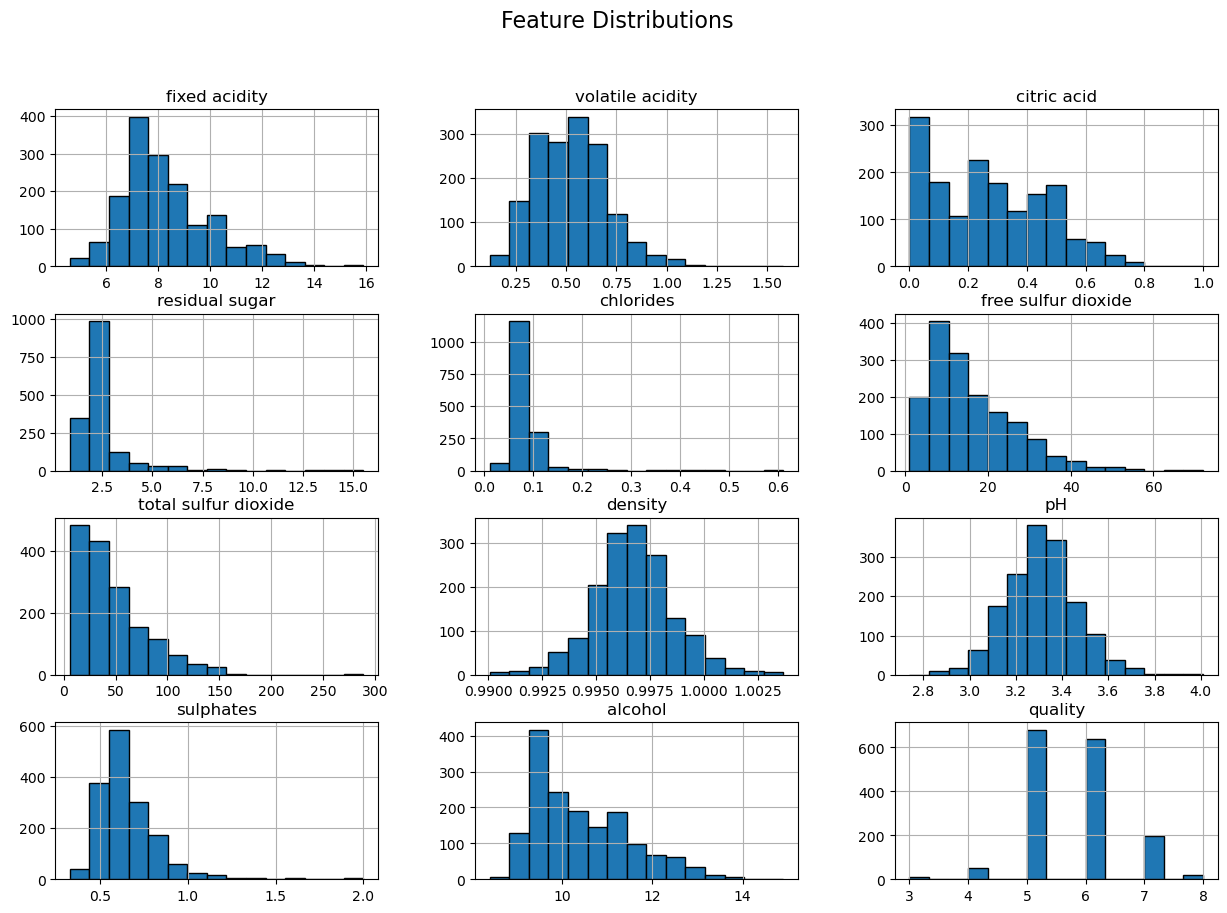

In [6]:
data.hist(bins=15, figsize=(15, 10), layout=(4, 3), edgecolor='black')
plt.suptitle('Feature Distributions', size=16)
plt.show()

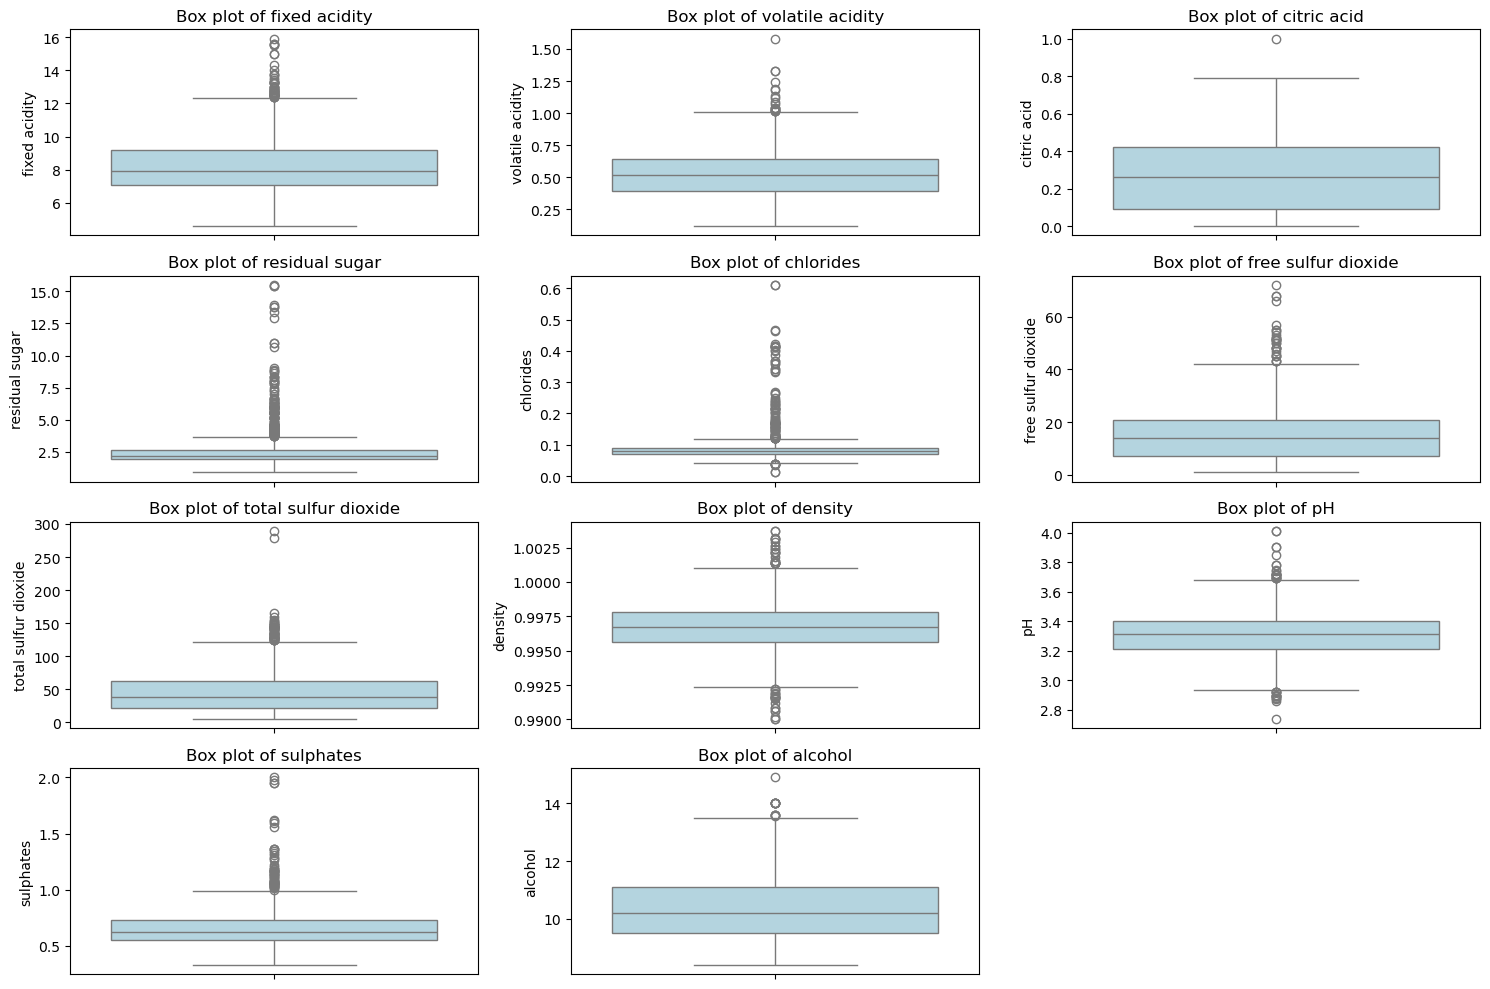

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):  # Skip 'quality'
    plt.subplot(4, 3, i)
    sns.boxplot(data=data[col], color='lightblue')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [8]:
correlation_matrix = data.corr()

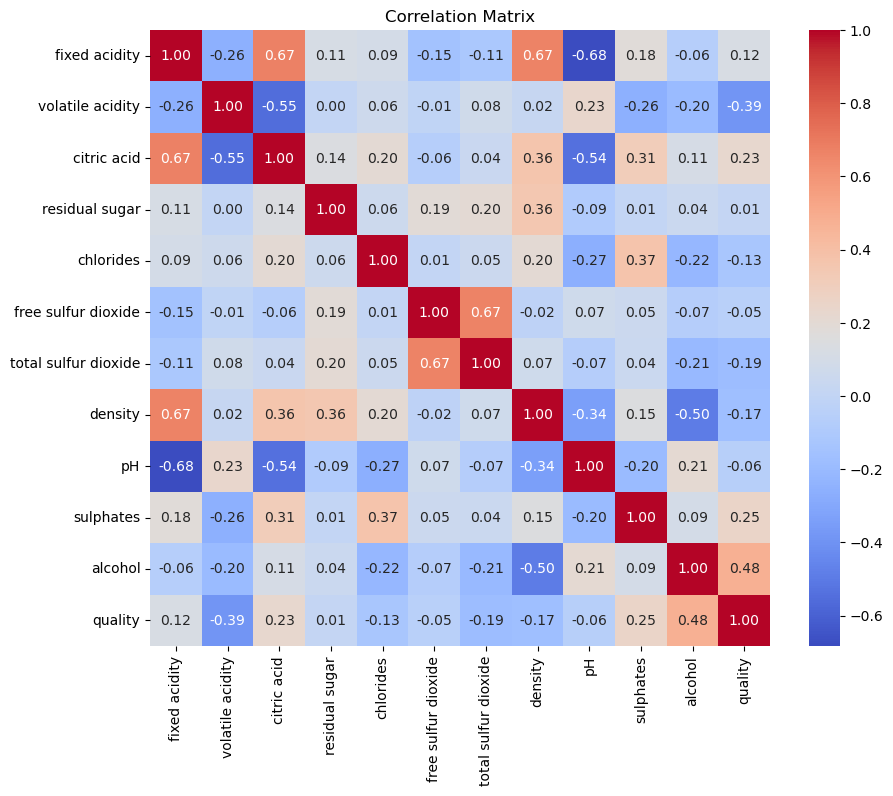

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
missing_values = data[data.isnull().any(axis=1)]
print("\nRows with missing values:")
print(missing_values)


Rows with missing values:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


In [12]:
data['quality_label'] = data['quality'].apply(lambda x: 1 if x > 7 else 0)

In [13]:
X = data.drop(columns=['quality', 'quality_label'])  
y = data['quality_label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# 4. Feature Scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# 6. Decision Tree Classifier Model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)  # No need to scale for tree-based models
y_pred_dt = dt_clf.predict(X_test)

# 7. Random Forest Classifier Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)  # No need to scale for tree-based models
y_pred_rf = rf_clf.predict(X_test)

# 8. Gradient Boosting Classifier Model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)  # No need to scale for tree-based models
y_pred_gb = gb_clf.predict(X_test)

# 9. Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate each model
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Model: Logistic Regression
Accuracy: 0.9844
Confusion Matrix:
[[315   0]
 [  5   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       315
           1       0.00      0.00      0.00         5

    accuracy                           0.98       320
   macro avg       0.49      0.50      0.50       320
weighted avg       0.97      0.98      0.98       320

Model: Decision Tree
Accuracy: 0.9688
Confusion Matrix:
[[310   5]
 [  5   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       315
           1       0.00      0.00      0.00         5

    accuracy                           0.97       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.97      0.97      0.97       320

Model: Random Forest
Accuracy: 0.9844
Confusion Matrix:
[[315   0]
 [  5   0]]
Classification Report:
              precision    recall 